## Importing Libraries

- **pandas**: For data manipulation and analysis
- **sklearn.cluster**: For clustering algorithms
- **sklearn.model_selection**: For splitting the dataset into training and testing sets
- **sklearn.ensemble**: For building ensemble models
- **scipy.cluster.hierarchy**: For hierarchical clustering algorithms
- **matplotlib.pyplot**: For data visualization
- **seaborn**: For creating attractive and informative statistical graphics
- **random**: For generating random numbers
- **numpy**: For numerical computing


In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from scipy.spatial.distance import cdist
import random as rd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import os


## Reading in the input data


In [2]:
# Load the data
try:
    data = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Could not find the input file. Please check the file path and try again.")
    exit()

## Viewing the first few rows of the data


In [3]:
data.head()

,device_name,min_consumption,max_consumption,device_age
0,bulb,100.0,120.0,3
1,LED TV 42 INCH,58.0,60.0,5
2,3''belt sander,1000.0,1000.0,4
3,Air cooler,65.0,80.0,4
4,Air purifier,25.0,30.0,3


## Getting values for input_power, working_hours, and output_power

This code cell generates values for the `input_power`, `working_hours`, and `output_power` columns of the `data` DataFrame based on the `min_consumption` and `max_consumption` columns.


In [4]:
min_c = data['min_consumption'].values
max_c = data['max_consumption'].values
random_consumption = [rd.uniform(min_c[i], max_c[i]) for i in range(len(min_c))]
working_hours = []
for i in range(len(min_c)):
    random_hours = rd.randint(0,24)
    working_hours.append(random_hours)
data['input_power'] = random_consumption
data['working_hours'] = working_hours
output_power = []
for i in range(len(min_c)):
    output_power.append(rd.uniform(random_consumption[i] * 0.70 , random_consumption[i]))
    output_power[i] = output_power[i]
data['output_power'] = output_power 
data.head()

,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power
0,bulb,100.0,120.0,3,111.686704,2,105.267346
1,LED TV 42 INCH,58.0,60.0,5,59.913431,15,58.061947
2,3''belt sander,1000.0,1000.0,4,1000.000000,9,841.722096
3,Air cooler,65.0,80.0,4,78.209545,6,69.808640
4,Air purifier,25.0,30.0,3,25.863548,20,23.046621


## Calculating efficiency metrics

This code cell calculates the `Enhanced_efficiency` and `efficiency` columns of the `data` DataFrame based on the `input_power`, `output_power`, and `min_consumption` columns.


In [5]:
Enhanced_efficiency = []
for i in range(len(min_c)):
    Enhanced_efficiency.append(output_power[i]/random_consumption[i]*100)
data['Enhanced_efficiency'] = Enhanced_efficiency
efficiency = data['output_power']/data['min_consumption']*100
data['efficiency'] = efficiency
data.head()


,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,111.686704,2,105.267346,94.252352,105.267346
1,LED TV 42 INCH,58.0,60.0,5,59.913431,15,58.061947,96.909734,100.106805
2,3''belt sander,1000.0,1000.0,4,1000.000000,9,841.722096,84.172210,84.172210
3,Air cooler,65.0,80.0,4,78.209545,6,69.808640,89.258466,107.397908
4,Air purifier,25.0,30.0,3,25.863548,20,23.046621,89.108504,92.186483


## Handling values


In [6]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data.head()

,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,111.686704,2,105.267346,94.252352,105.267346
1,LED TV 42 INCH,58.0,60.0,5,59.913431,15,58.061947,96.909734,100.106805
2,3''belt sander,1000.0,1000.0,4,1000.000000,9,841.722096,84.172210,84.172210
3,Air cooler,65.0,80.0,4,78.209545,6,69.808640,89.258466,107.397908
4,Air purifier,25.0,30.0,3,25.863548,20,23.046621,89.108504,92.186483


## Adjusting efficiency values


In [7]:
List_efficiency = data['efficiency'].values
List_enhan_efficiency = data['Enhanced_efficiency'].values

for i in range(len(List_efficiency)):
    # if enhance efficiency is greater than enhance efficiency then minus abs value for efficiency
    if List_enhan_efficiency[i] > List_efficiency[i]:
        List_efficiency[i] = List_efficiency[i] - abs(List_enhan_efficiency[i] - List_efficiency[i])
    # if enhance efficiency is less than enhance efficiency then plus abs value for efficiency
    elif List_enhan_efficiency[i] < List_efficiency[i]:
        List_efficiency[i] = List_efficiency[i] + abs(List_enhan_efficiency[i] - List_efficiency[i])
    # if enhance efficiency is equal to enhance efficiency then plus abs value for efficiency
    else:
        List_efficiency[i] = List_efficiency[i] + abs(List_enhan_efficiency[i] - List_efficiency[i])
data['efficiency'] = List_efficiency
#efficiency must between 40  to 70 but with formula that multiply with values that make it between 40 to 70
data['efficiency'] = data['efficiency'].apply(lambda x: x * 0.3 if x < 40 else x)
data['efficiency'] = data['efficiency'].apply(lambda x: x * 0.7 if x > 70 else x)
data['efficiency'] = data['efficiency'].apply(lambda x: 40 if x < 40 else x)
data['efficiency'] = data['efficiency'].apply(lambda x: 70 if x > 70 else x)

data['Enhanced_efficiency'] = data['Enhanced_efficiency'].apply(lambda x: 200 if x > 200 else x)
data['Enhanced_efficiency'] = data['Enhanced_efficiency'].apply(lambda x: 0 if x < 0 else x)
data.head()


,device_name,min_consumption,max_consumption,device_age,input_power,working_hours,output_power,Enhanced_efficiency,efficiency
0,bulb,100.0,120.0,3,111.686704,2,105.267346,94.252352,70.000000
1,LED TV 42 INCH,58.0,60.0,5,59.913431,15,58.061947,96.909734,70.000000
2,3''belt sander,1000.0,1000.0,4,1000.000000,9,841.722096,84.172210,58.920547
3,Air cooler,65.0,80.0,4,78.209545,6,69.808640,89.258466,70.000000
4,Air purifier,25.0,30.0,3,25.863548,20,23.046621,89.108504,66.685124


## Training a GradientBoostingRegressor model


In [17]:
X = data[['min_consumption', 'max_consumption', 'input_power']]
y = data['efficiency']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
Normal = GradientBoostingRegressor(random_state=0)
Normal.fit(X_train, y_train)
Normal.score(X_test, y_test)


0.2920373847923784

In [18]:
X.head()


,min_consumption,max_consumption,input_power
0,100.0,120.0,111.686704
1,58.0,60.0,59.913431
2,1000.0,1000.0,1000.000000
3,65.0,80.0,78.209545
4,25.0,30.0,25.863548


In [19]:
#feature to predict enhanced efficiency with K-centroid
X = data[['min_consumption', 'max_consumption', 'input_power']]
y = data['Enhanced_efficiency']


In [20]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ghora = hc.fit_predict(X)
print(ghora)

[2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 2 1 0 0 2 1 0 1 0 2 2 2
 2 2 2 2 2 2 0 2 0 2 2 0 2 2 0 2 0 1 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 1 2 2 2
 2 0 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 2 2 0 0 0 2 2 0 2 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 0 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0 2 2 0 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 2
 0 0 1 2 2 0 0 0 0 1 2 0 2 0 2 2 2 0 1 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [21]:
ghora = pd.DataFrame(ghora)
ghora.describe()

,0
count,299.000000
mean,1.538462
std,0.823945
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


In [22]:
X.describe()

,min_consumption,max_consumption,input_power
count,299.000000,299.000000,299.000000
mean,549.509826,855.704057,724.006437
std,1088.167077,1806.556119,1503.339161
min,0.500000,0.000000,0.697315
25%,18.500000,26.300000,21.834564
50%,99.678000,150.000000,111.686704
75%,700.000000,933.500000,829.120145
max,8000.000000,14000.000000,12258.125582


In [23]:
def find_centroid(cluster):
    """
    Calculates the centroid of a cluster.

    Args:
    
        cluster: A list of data points.

    Returns:
        The centroid of the cluster.
    """
    # get |c|
    centroid = sum(cluster) / len(cluster)
    return centroid

## k-centroid hierarchical clustering


In [24]:
import numpy as np

def hierarchical_clustering(dataset, k):
    """
    Performs hierarchical clustering on the given dataset using k-centroid link.

    Args:
        dataset: A list of data points.
        k: The number of neighbors of a centroid.

    Returns:
        A tuple containing a list of clusters and a dictionary mapping each object to its cluster ID.
    """
    # Initialize the clusters.
    clusters = [[x] for x in dataset]
    cluster_ids = {tuple(x): i for i, cluster in enumerate(clusters) for x in cluster}
    
    # Iterate over all pairs of clusters.
    for _ in range(len(dataset) - 1):
        min_distance = float('inf')
        merge_clusters = ()
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                # Calculate the distance between the two clusters.
                dist_1 = []
                dist_2 = []
                
                # Find centroids for clusters Ci and Cj.
                centroid_i = find_centroid(clusters[i])
                centroid_j = find_centroid(clusters[j])
                
                # Calculate distances from objects in Ci to centroid_i.
                for obj in clusters[i]:
                    dist_1.append(np.linalg.norm(obj - centroid_i))
                
                # Calculate distances from objects in Cj to centroid_j.
                for obj in clusters[j]:
                    dist_2.append(np.linalg.norm(obj - centroid_j))
                
                # Select the k nearest neighbors from each cluster.
                dist_1 = sorted(dist_1)[:k]
                dist_2 = sorted(dist_2)[:k]
                
                neighbors = []
                for obj1 in dist_1:
                    for obj2 in dist_2:
                        # obj1 and obj2 are the distances from Ci to Cj and Cj to Ci respectively calculated above.
                        neighbors.append(obj1 + obj2)

                # Calculate the average = total distance / min(k, len(Ci) * len(Cj)).
                average_distance = sum(neighbors) / min(k, len(clusters[i]) * len(clusters[j]))
                if average_distance < min_distance:
                    min_distance = average_distance
                    # Store the closest pair of clusters.
                    merge_clusters = (i, j)
        
        # Merge the two closest clusters.
        merged_cluster = clusters[merge_clusters[0]] + clusters[merge_clusters[1]]
        clusters = [c for idx, c in enumerate(clusters) if idx not in merge_clusters]
        clusters.append(merged_cluster)
        
        # Update cluster IDs for objects in the merged cluster.
        for obj in merged_cluster:
            cluster_ids[tuple(obj)] = len(clusters) - 1
    
    # Return the list of clusters and the dictionary mapping each object to its cluster ID.
    return clusters, cluster_ids


In [25]:
# Perform clustering on the training data
k = 3
clusters, cluster_assignments = hierarchical_clustering(X.values, k)

In [26]:
clusters
cluster_assignments

{(100.0, 120.0, 111.6867040530957): 0,
 (58.0, 60.0, 59.91343135242309): 0,
 (1000.0, 1000.0, 1000.0): 0,
 (65.0, 80.0, 78.20954543162216): 0,
 (25.0, 30.0, 25.863548168558047): 0,
 (2.0, 3.0, 2.8628734408048055): 0,
 (2.0, 4.0, 2.0752104084948657): 0,
 (40.0, 80.0, 76.97692938309916): 0,
 (20.0, 50.0, 36.41749724213956): 0,
 (3.0, 6.0, 5.631579173950732): 0,
 (60.0, 150.0, 117.49285584111433): 0,
 (60.0, 70.0, 61.043721706342524): 0,
 (1.0, 2.0, 1.6317736060676915): 0,
 (1000.0, 4000.0, 3536.1895088967594): 0,
 (800.0, 1400.0, 835.2030478361082): 0,
 (25.0, 30.0, 29.09785382676029): 0,
 (20.0, 30.0, 20.381158641767996): 0,
 (600.0, 850.0, 781.2762874815423): 0,
 (70.0, 150.0, 101.59607361474144): 0,
 (30.0, 60.0, 41.90034867064401): 0,
 (25.0, 35.0, 29.37327062556394): 0,
 (5.0, 9.0, 8.533513988379907): 0,
 (100.0, 450.0, 124.10275941018173): 0,
 (1200.0, 1500.0, 1395.9193712621486): 0,
 (200.0, 300.0, 260.3470739095426): 0,
 (26.0, 60.0, 51.59026529532639): 0,
 (8000.0, 14000.0, 1225

In [30]:
x_clusters = clusters[0]
x_clusters

[array([ 8000.        , 14000.        , 12258.12558167]),
 array([2000.        , 3000.        , 2673.99916541]),
 array([ 7500.        , 10500.        ,  8559.26999081]),
 array([220.        , 270.        , 247.97445141]),
 array([6600.        , 8800.        , 7883.05572463]),
 array([1300.        , 1500.        , 1315.78426567]),
 array([3250.        , 9750.        , 6289.00548139]),
 array([240.        , 860.        , 712.63591404]),
 array([1500.        , 4500.        , 1954.24634999]),
 array([ 3800.        , 11400.        , 10050.50164905]),
 array([3000.        , 7500.        , 5997.20784148]),
 array([ 50.        , 100.        ,  72.68099527]),
 array([ 500.        , 1800.        , 1076.46918693]),
 array([5400.        , 6750.        , 6042.63564872]),
 array([ 4.        , 34.        ,  8.29682049]),
 array([1800.        , 5000.        , 4310.97525968]),
 array([1800.        , 5000.        , 2434.65142722]),
 array([100., 100., 100.]),
 array([1.        , 2.        , 1.63177361]

In [31]:
#create seprate clustering for each cluster
temp_cluster = x_clusters
temp_cluster = pd.DataFrame(temp_cluster)
temp_cluster.head()

,0,1,2
0,8000.0,14000.0,12258.125582
1,2000.0,3000.0,2673.999165
2,7500.0,10500.0,8559.269991
3,220.0,270.0,247.974451
4,6600.0,8800.0,7883.055725


### Testing Standard Scaler

In [32]:
C1 = temp_cluster[[0]]
C2 = temp_cluster[[1]]
C3 = temp_cluster[[2]]

hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ghora1 = hc.fit_predict(C1)
ghora1 = pd.DataFrame(ghora1)

hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ghora2 = hc.fit_predict(C2)
ghora2 = pd.DataFrame(ghora2)

hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ghora3 = hc.fit_predict(C3)
ghora3 = pd.DataFrame(ghora3)

/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [56]:
ghora1.describe()

,0
count,299.000000
mean,0.020067
std,0.140464
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [57]:
ghora2.describe()

,0
count,299.000000
mean,0.943144
std,0.231956
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [58]:
ghora3.describe()

,0
count,299.00000
mean,0.03010
std,0.17115
min,0.00000
25%,0.00000
50%,0.00000
75%,0.00000
max,1.00000


In [33]:
total_std = ghora1.std() + ghora2.std() + ghora3.std()
total_std

0    0.649689
dtype: float64

In [34]:
X_new = pd.DataFrame()
for i, value in enumerate(x_clusters):
    X_new[i] = value
X_new = X_new.T
X_new.columns = ['min_consumption', 'max_consumption', 'input_power']
X_new.head()

/tmp/ipykernel_6184/2450358325.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new[i] = value
/tmp/ipykernel_6184/2450358325.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new[i] = value
/tmp/ipykernel_6184/2450358325.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new[i] = value
/

,min_consumption,max_consumption,input_power
0,8000.0,14000.0,12258.125582
1,2000.0,3000.0,2673.999165
2,7500.0,10500.0,8559.269991
3,220.0,270.0,247.974451
4,6600.0,8800.0,7883.055725


In [35]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_new)
print(y_hc)

[1 0 1 2 1 0 1 2 0 1 1 2 0 1 2 0 0 2 2 0 0 1 2 0 0 2 1 0 0 2 2 0 0 2 0 2 1
 0 2 0 0 0 0 0 2 2 0 0 2 2 2 0 2 0 0 0 2 0 2 0 2 0 2 0 0 2 0 2 2 0 0 2 2 0
 2 0 0 0 0 2 0 2 0 2 0 0 0 2 0 2 0 2 0 2 2 0 2 0 0 2 2 0 2 0 2 0 2 2 2 2 2
 0 0 2 2 0 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [37]:
#get standard deviation y_hc
std_y_hc = np.std(y_hc)
print(std_y_hc)

0.822565715030794


#### 0.8136512698596342 - ward
#### 0.19752271652486159 - complete
#### 0.1726866975709108 - single
#### 0.1823892736379395 - average



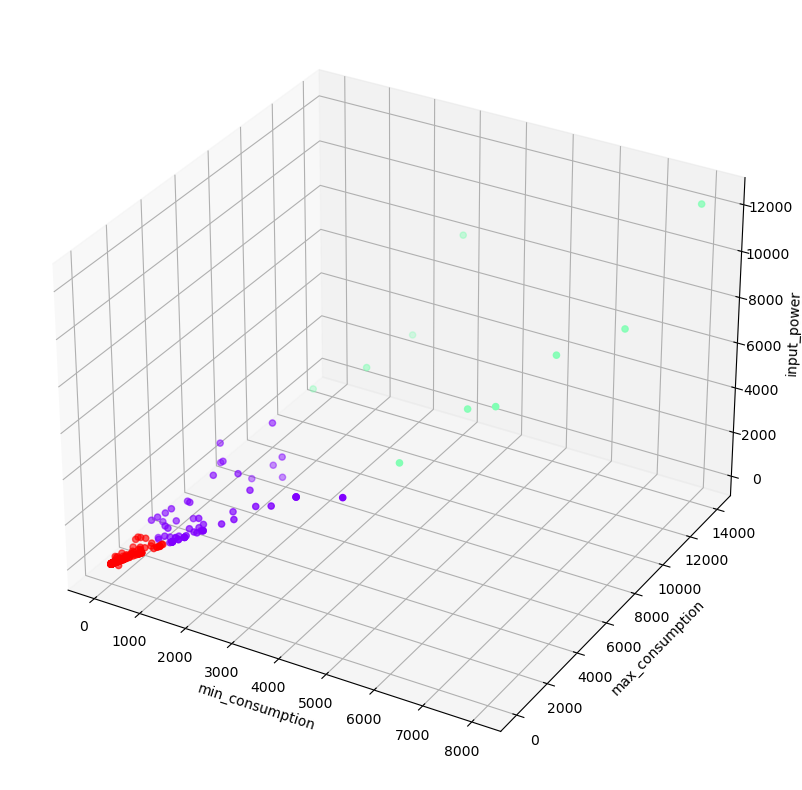

In [39]:
#plot 3d graph of normal and enhanced efficiency
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_new['min_consumption'], X_new['max_consumption'], X_new['input_power'], c=y_hc, cmap='rainbow')
ax.set_xlabel('min_consumption')
ax.set_ylabel('max_consumption')
ax.set_zlabel('input_power')
plt.show()

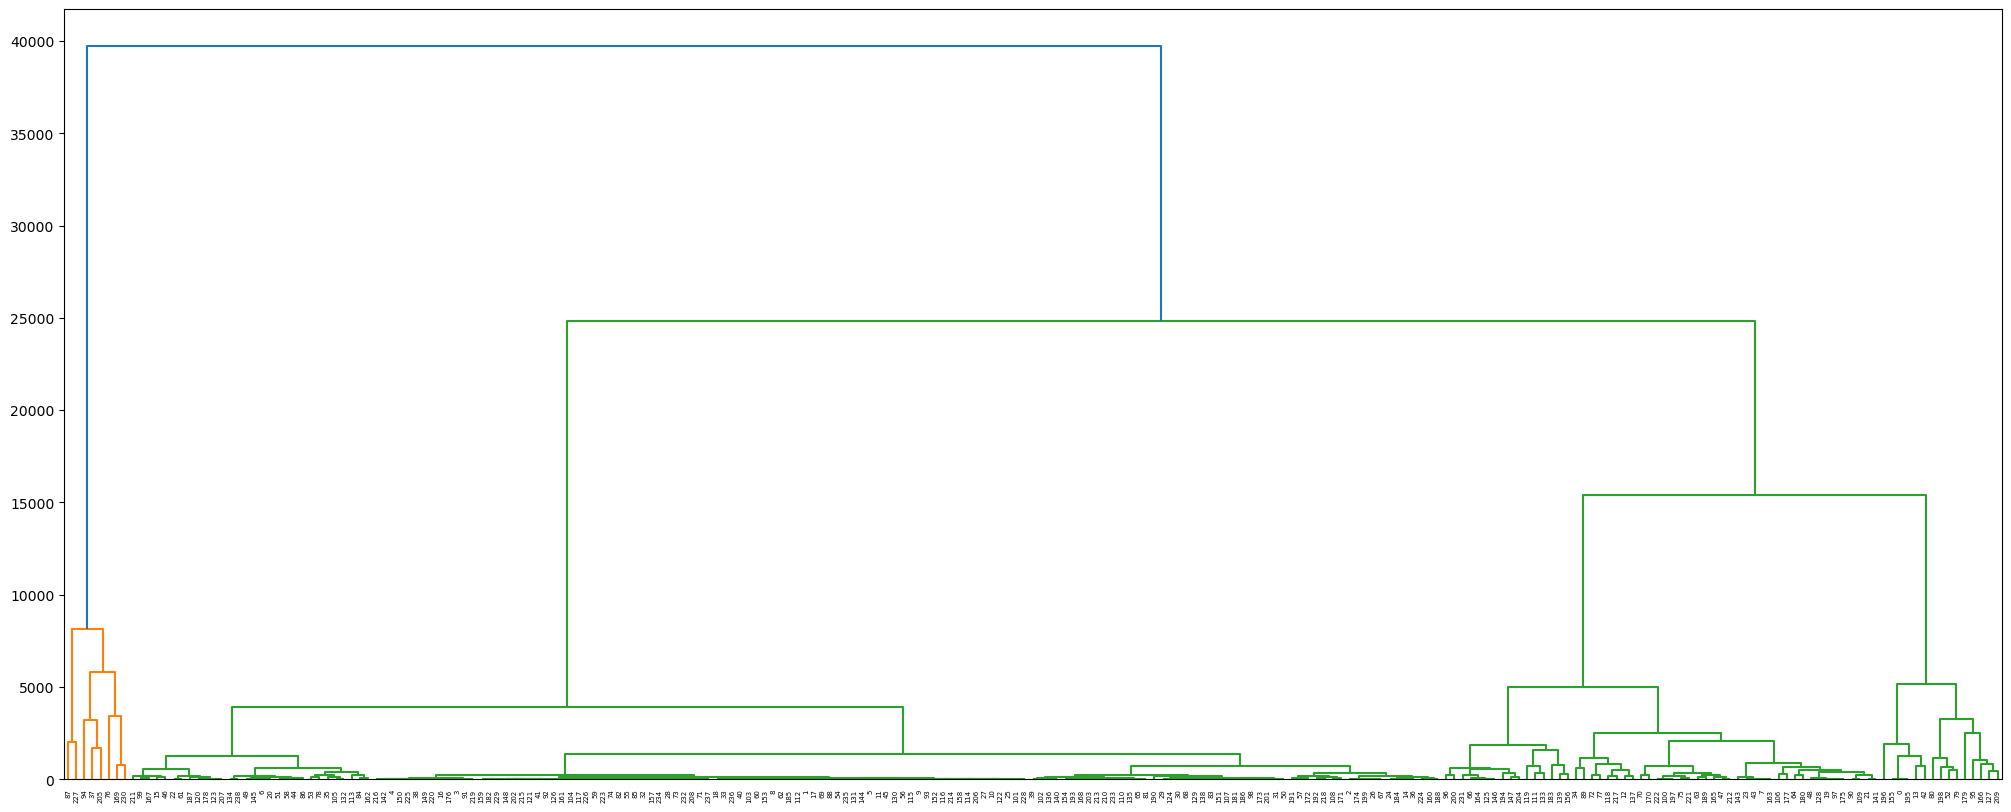

In [42]:
Z = linkage(X_train, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

## Gradient Boosting Regressor Model with Enhanced Efficiency


In [43]:
enhanced_features = X_new[['min_consumption', 'max_consumption', 'input_power']]
enhanced_efficiency = data['Enhanced_efficiency']
X_train, X_test, y_train, y_test = train_test_split(enhanced_features, enhanced_efficiency, test_size=0.2, random_state=0)
Enhanced = GradientBoostingRegressor(random_state=0)
Enhanced.fit(X_train, y_train)
Enhanced.score(X_test, y_test)


-0.07505895007070862

## Test input


In [45]:
Extra_test_data = [
    [150, 450, 250],
    [50, 300, 150],
    [250, 700, 475],
    [175, 475, 300],
    [125, 525, 350],
    [75, 250, 175],
    [225, 550, 375],
    [125, 450, 275],
    [25, 200, 100],
    [275, 575, 425],
    [125, 350, 225],
    [50, 150, 100],
    [275, 475, 375],
    [175, 375, 275],
    [225, 625, 425],
    [100, 300, 200],
    [200, 700, 450],
    [50, 200, 125],
    [275, 475, 350],
    [150, 400, 275],
    [125, 525, 350],
    [75, 275, 175],
    [225, 550, 350],
    [125, 450, 300],
    [25, 175, 100],
    [300, 600, 450],
    [150, 350, 225],
    [50, 150, 100],
    [275, 475, 350],
    [175, 375, 250],
    [225, 625, 425],
    [100, 300, 200],
    [200, 700, 500],
    [50, 200, 125],
    [275, 475, 375],
    [150, 400, 275],
    [125, 525, 375],
    [75, 275, 175],
    [225, 550, 375],
    [125, 450, 275],
    [25, 175, 125],
    [300, 600, 450],
    [150, 350, 225],
    [50, 150, 100],
    [275, 475, 350],
    [175, 375, 250],
    [225, 625, 400],
    [100, 300, 200],
    [200, 700, 500],
    [50, 200, 125]
]

In [49]:
N_predictions = Normal.predict(Extra_test_data)
print(N_predictions)


[67.97228058 70.13702632 69.54079128 68.3019254  67.91608016 68.6986495
 67.62811057 68.84083896 70.64445034 69.79119153 67.07084347 70.22965151
 67.51067191 69.25046921 70.58244502 68.35592468 70.58244502 69.89941857
 67.51067191 68.15633314 67.91608016 68.93625724 67.62811057 68.58989499
 70.64445034 68.87110443 65.05353175 70.22965151 67.51067191 69.25046921
 70.58244502 68.35592468 70.52329846 69.89941857 67.51067191 68.15633314
 67.91608016 68.93625724 67.62811057 68.84083896 70.31421741 68.87110443
 65.05353175 70.22965151 67.51067191 69.25046921 70.58244502 68.35592468
 70.52329846 69.89941857]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [50]:
E_predictions = Enhanced.predict(Extra_test_data)
print(E_predictions)

[85.67990613 84.69410423 90.47366391 88.26488099 92.80866022 83.25118005
 89.44024862 86.27549331 81.8572278  89.44024862 85.18227096 83.27529097
 84.09147807 85.67990613 89.44024862 84.28162285 93.24648833 88.25975241
 84.09147807 85.67990613 92.80866022 83.54157574 89.44024862 87.52832171
 81.8572278  90.99149224 84.58668378 83.27529097 84.09147807 85.67990613
 89.44024862 84.28162285 93.24648833 88.25975241 84.09147807 85.67990613
 92.80866022 83.54157574 89.44024862 86.27549331 86.84168923 90.99149224
 84.58668378 83.27529097 84.09147807 85.67990613 89.44024862 84.28162285
 93.24648833 88.25975241]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


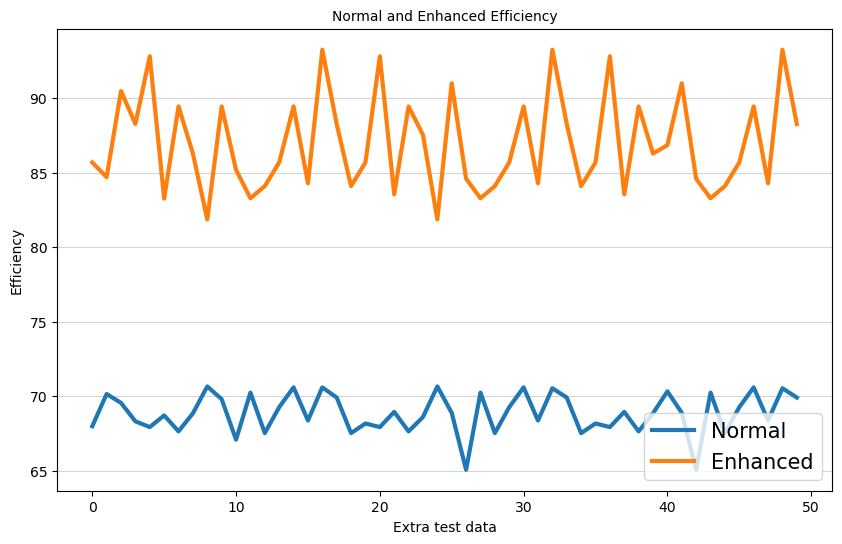

In [86]:
#line plot for normal and enhanced efficiency
plt.figure(figsize=(10, 6))
plt.plot(N_predictions, label='Normal',  linewidth=3, markersize=12)
plt.plot(E_predictions, label='Enhanced',  linewidth=3, markersize=12)
plt.title('Normal and Enhanced Efficiency', fontsize=10)
plt.grid(color='black', linestyle='-', linewidth=0.4, alpha=0.3, axis='y', which='both')
plt.xlabel('Extra test data', fontsize=10)
plt.ylabel('Efficiency', fontsize=10)
plt.legend(loc='lower right', fontsize=15)
plt.show()



In [44]:
test_input = [[300, 600, 400]]
test_output = Normal.predict(test_input)
print("Normal efficiency: ", test_output)
test_output = Enhanced.predict(test_input)
print("Enhanced efficiency: ", test_output)


Normal efficiency:  [68.87110443]
Enhanced efficiency:  [90.99149224]


/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/home/xer0bit/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Saving models


In [31]:
import pickle
try:
    os.mkdir('pretrained_model')
except:
    pass
pickle.dump(Normal, open('pretrained_model/Normal.pkl', 'wb'))
pickle.dump(Enhanced, open('pretrained_model/K_centroid.pkl', 'wb'))
print("Model saved successfully")

Model saved successfully
